In [80]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import metrics
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [81]:
from tensorflow import keras
print(tf.__version__)


2.16.1


In [82]:
import os
from os.path import isfile, join
import re


mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (28,28))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [83]:
load_data()

!
)
+
sum


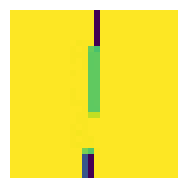

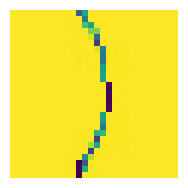

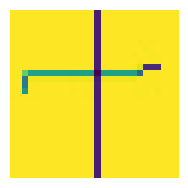

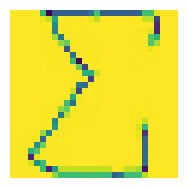

In [84]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr) 



X_val = np.array(X_train[:500] /255.0)
Y_val = np.array(Y_train[:500]) 

X_train = np.array(X_train [500:] /255.0)
Y_train = np.array(Y_train [500:])

X_test = np.array(X_test /255.0)
Y_test = np.array(Y_test)

print(X_train[4])


[[1.         1.         1.         1.         1.         1.
  1.         0.99215686 0.99607843 1.         0.99607843 0.99215686
  1.         0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
  0.99607843 0.99607843 1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  0.99607843 1.         0.99607843 0.99215686 1.         1.
  0.99215686 1.         1.         0.99607843 0.98039216 1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         0.99215686
  0.99607843 0.99607843 0.99607843 1.         0.99607843 1.
  1.         1.         0.99607843 0.99607843 0.99607843 0.99607843
  0.99607843 0.99607843 1.         1.         1.         1.
  1.         0.48235294 0.48235294 0.48235294]
 [1.         1.         1.         1.         1.         0.99215686
  1.         0.99607843 1.         0.99

In [94]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist

In [95]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(3250, 28, 28)
(500, 28, 28)
(1250, 28, 28)


In [96]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

C:\Users\zuhai\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [97]:
#Visualize Network Model
modelViz_file= 'model_1.png' # Model filename

# Plot model
keras.utils.plot_model(model, to_file=modelViz_file, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [98]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1298 - loss: 2.4652 - val_accuracy: 0.1840 - val_loss: 2.0656
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 2.0047 - val_accuracy: 0.4260 - val_loss: 1.7329
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 1.7088 - val_accuracy: 0.6680 - val_loss: 1.4448
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.4257 - val_accuracy: 0.7160 - val_loss: 1.2477
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 1.2081 - val_accuracy: 0.7800 - val_loss: 1.0447
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 1.0252 - val_accuracy: 0.7680 - val_loss: 0.9210
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.8619 - val_accuracy: 0.8180 - val_loss: 0.8090
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.7778 - val_accuracy: 0.

In [100]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))


Epoch 1/10


C:\Users\zuhai\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1563 - loss: 2.3377 - val_accuracy: 0.1720 - val_loss: 2.2005
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 2.1236 - val_accuracy: 0.3620 - val_loss: 2.0033
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3469 - loss: 1.9559 - val_accuracy: 0.2920 - val_loss: 1.9016
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4393 - loss: 1.8088 - val_accuracy: 0.3860 - val_loss: 1.7192
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5155 - loss: 1.6752 - val_accuracy: 0.3820 - val_loss: 1.7198
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 1.5084 - val_accuracy: 0.4700 - val_loss: 1.4790
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 1.3812 - val_accuracy: 0.7140 - val_loss: 1.2959
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 1.2535 - val_accuracy: 0.7440 - val_

In [101]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

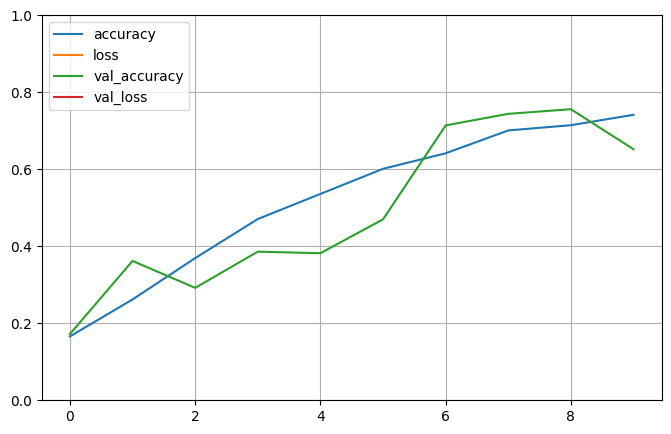

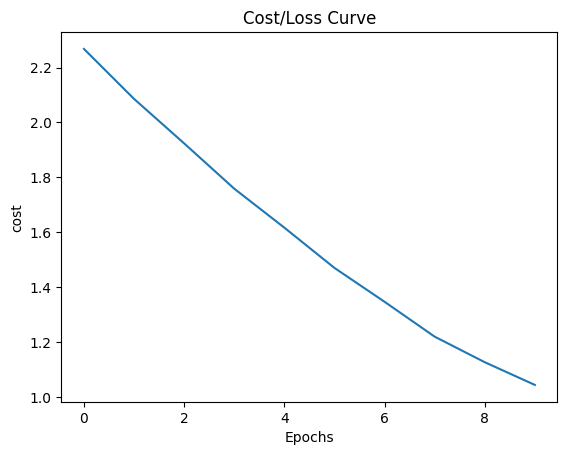

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [103]:
model.evaluate(X_test, Y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.7411


[0.7280617952346802, 0.746399998664856]